In [1]:
import pandas as pd
import numpy as np
from keras.models import Model,Sequential
from keras.layers import Input,Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
data = pd.read_csv("iris.data", header=None)
#X = dataset[:,0:4].astype(float)
#Y = dataset[:,4]

In [3]:
data.columns = ['f1', 'f2', 'f3', 'f4','class']

In [4]:
X = data.loc[:,['f1','f2','f3','f4']]

In [5]:
y1 = data.loc[:,['class']]

In [6]:
#y1.values

In [7]:
'''
now I am adding a regression value to each class so that I can implement
classification and regression in the same model.
Classes are flower types:
Iris-setosa, Iris-versicolor,Iris-virginica

So I am adding another output of flower price in INR. In my opinion, Iris-versicolor
flowers look the best, then Iris-virginica and then Iris-setosa
So, these values will come from particular normal distributions N(mu,sigma)

Iris-setosa     = N(10, 2)
Iris-versicolor = N(30, 2)
Iris-virginica  = N(20, 2)


'''


'\nnow I am adding a regression value to each class so that I can implement\nclassification and regression in the same model.\nClasses are flower types:\nIris-setosa, Iris-versicolor,Iris-virginica\n\nSo I am adding another output of flower price in INR. In my opinion, Iris-versicolor\nflowers look the best, then Iris-virginica and then Iris-setosa\nSo, these values will come from particular normal distributions N(mu,sigma)\n\nIris-setosa     = N(10, 2)\nIris-versicolor = N(30, 2)\nIris-virginica  = N(20, 2)\n\n\n'

In [8]:
price_setosa = np.random.normal(10, 2, 50)
price_versicolor = np.random.normal(30, 2, 50)
price_virginica = np.random.normal(20, 2, 50)

In [9]:
price_setosa

array([10.39431155, 10.23521439,  9.752962  , 10.4545211 , 10.08270629,
        9.07581565, 10.52317726,  6.88078101,  9.39544959, 10.569975  ,
        8.17879649,  9.55466383,  6.67563498, 12.92822657,  8.28297962,
        9.29561858,  9.95452394,  8.20207926,  6.73971731, 12.97270647,
       13.91838987,  8.5408947 ,  8.09707689, 10.22695383,  9.66285577,
       10.91214416,  9.5265975 ,  9.80511761,  9.8050135 ,  5.97453305,
        9.62645591,  8.13866625, 13.09251081, 13.17493483, 11.48091931,
       10.43711817,  7.37377341, 12.99878288,  8.42664842, 10.20644255,
       12.2181329 ,  9.55149663, 12.24654915, 10.45565988, 12.31417743,
        8.88466582,  7.28147016, 11.33433278,  7.96684422, 13.07643684])

In [10]:
price_versicolor

array([28.15493101, 28.36328231, 33.15959938, 31.0356771 , 32.17931077,
       28.21844302, 28.02495353, 26.27508107, 31.34873796, 34.34801632,
       32.28642603, 33.87078192, 34.32090826, 25.62202999, 28.44216386,
       30.4995459 , 30.59062235, 26.80123546, 28.82044105, 31.10679643,
       29.81998631, 26.89027428, 31.55221394, 30.74021715, 26.02746511,
       29.2564338 , 28.31847599, 32.81123493, 30.37534072, 31.46690674,
       31.08454488, 22.74191947, 27.14049423, 29.43516228, 28.07465169,
       31.99394319, 30.72368611, 25.78618032, 30.11886164, 30.72778879,
       29.18475711, 30.36010009, 30.27819296, 31.65394457, 30.94236883,
       31.8776714 , 28.42897151, 32.28775605, 32.23579114, 27.69622114])

In [11]:
price_virginica

array([20.09415976, 21.51994588, 17.53180541, 21.65682567, 21.12973557,
       19.51264767, 22.05512716, 18.45020894, 15.92840357, 21.05530426,
       21.3986032 , 22.19377626, 20.70704654, 20.09952345, 20.19571804,
       21.98075567, 19.62998535, 21.80528506, 22.70952158, 24.60410901,
       18.55559213, 18.56212526, 18.75801624, 21.57851071, 19.269083  ,
       20.09280057, 22.78527978, 22.92384195, 21.30967355, 22.06131389,
       21.52906612, 20.29892554, 18.66220668, 18.6883969 , 17.84121474,
       21.15717493, 20.17997989, 16.7619327 , 24.15476533, 20.03180259,
       18.63423553, 16.72186575, 19.12355258, 20.08385074, 17.67191239,
       21.77067813, 17.92270279, 18.93361997, 19.90002493, 17.01189165])

In [12]:
iris_price = np.concatenate((price_setosa,price_versicolor,price_virginica))

In [13]:
iris_price = pd.DataFrame(iris_price, columns=['price'])

In [14]:
iris_price

,price
0,10.394312
1,10.235214
2,9.752962
3,10.454521
4,10.082706
...,...
145,21.770678
146,17.922703
147,18.933620
148,19.900025


In [15]:
"""

now we have set up all the variables, now we can make the model

"""

'\n\nnow we have set up all the variables, now we can make the model\n\n'

In [16]:
encoder = LabelEncoder()
y_class = encoder.fit_transform(y1)
# convert integers to dummy variables (i.e. one hot encoded)
y_class = np_utils.to_categorical(y_class)

/home/xinfy/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
# one hot done for the y_class variable

In [18]:
X.shape

(150, 4)

In [19]:
y_class.shape

(150, 3)

In [20]:
y_reg = np.array(iris_price)

In [21]:
y_reg.shape

(150, 1)

In [22]:
#make train-test split

In [23]:
indices  = range(X.shape[0])
X_train, X_test, y_class_train, y_class_test, y_reg_train, y_reg_test, idx_train, idx_test = train_test_split(X, y_class, y_reg, indices, test_size=0.2, random_state=111)

In [24]:
X_train.shape, y_class_train.shape, y_reg_train.shape

((120, 4), (120, 3), (120, 1))

In [25]:
X_test.shape, y_class_test.shape, y_reg_test.shape

((30, 4), (30, 3), (30, 1))

In [48]:
try:
    del model
except:
    pass

In [49]:
# model define
input_1 = Input(shape=(4,), name='input')
dense_1 = Dense(8, activation='relu')(input_1)
dense_2 = Dense(8, activation='relu')(dense_1)

#classification output below
output_1 = Dense(3, activation='softmax', name='class_output')(dense_2)

#regression output below

output_2 = Dense(1, activation='linear',name='reg_output')(dense_1)

#model define
model = Model(inputs=[input_1], outputs=[output_1, output_2])

In [50]:
model.compile(optimizer='adam',
              loss={'class_output': 'categorical_crossentropy', 'reg_output': 'mse'},
              loss_weights={'class_output': 1., 'reg_output': 0.025},
              metrics={'class_output':'accuracy','reg_output':'mse'})

In [51]:
model_checkpoint = ModelCheckpoint('checkpoint.hdf5', monitor='val_loss', verbose=0, save_best_only=True, mode='min')

In [52]:
early_stopping = EarlyStopping(monitor='val_loss', patience=50)

In [53]:
try:
    del history
except:
    pass

In [54]:
history = model.fit({'input': X_train},
                {'class_output': y_class_train, 'reg_output': y_reg_train}, 
                validation_data=({'input': X_test},{'class_output': y_class_test, 'reg_output': y_reg_test}),callbacks=[model_checkpoint,early_stopping],
                epochs=300, batch_size=32,verbose=0)

In [55]:
#change verbose to print during training

In [33]:
import matplotlib.pyplot as plt
import matplotlib

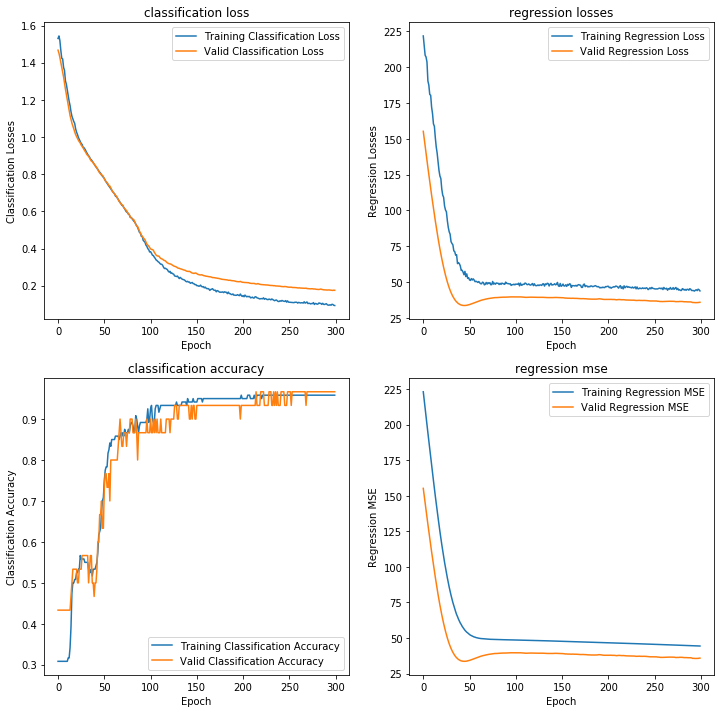

In [56]:
fig = plt.figure(figsize=(12,12))
plt.subplot(2, 2, 1)
#plt.plot(history.history['loss'])
plt.plot(history.history['class_output_loss'])
plt.plot(history.history['val_class_output_loss'])
plt.title("classification loss")
plt.ylabel("Classification Losses")
plt.xlabel("Epoch")
plt.legend(["Training Classification Loss","Valid Classification Loss"])
plt.subplot(2, 2, 2)
plt.plot(history.history['reg_output_loss'])
plt.plot(history.history['val_reg_output_loss'])
plt.title("regression losses")
plt.ylabel("Regression Losses")
plt.xlabel("Epoch")
plt.legend(["Training Regression Loss","Valid Regression Loss"])
plt.subplot(2, 2, 3)
plt.plot(history.history['class_output_accuracy'])
plt.plot(history.history['val_class_output_accuracy'])
plt.title("classification accuracy")
plt.ylabel("Classification Accuracy")
plt.xlabel("Epoch")
plt.legend(["Training Classification Accuracy","Valid Classification Accuracy"])
plt.subplot(2, 2, 4)
plt.plot(history.history['reg_output_mse'])
plt.plot(history.history['val_reg_output_mse'])
plt.title("regression mse")
plt.ylabel("Regression MSE")
plt.xlabel("Epoch")
plt.legend(["Training Regression MSE","Valid Regression MSE"])
#plt.show()
plt.savefig('loss_accuracy.png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

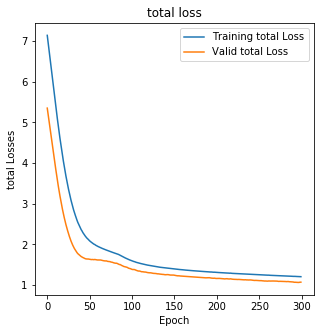

In [57]:
fig = plt.figure(figsize=(5,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("total loss")
plt.ylabel("total Losses")
plt.xlabel("Epoch")
plt.legend(["Training total Loss","Valid total Loss"])
plt.show()

In [36]:
#prediction on test data

In [37]:
from sklearn import metrics

In [58]:
#load best model
from keras.models import load_model
best_model = load_model('checkpoint.hdf5')

In [59]:
y_prediction = best_model.predict(X_test,verbose=0, batch_size = 32)

In [60]:
y_pred_classes, y_pred_reg = y_prediction[0],y_prediction[1]

In [61]:
#predicted
ypc_m = np.argmax(y_pred_classes, axis=1)
ypc_m

array([0, 0, 2, 2, 1, 0, 0, 2, 2, 1, 2, 0, 2, 2, 2, 0, 2, 1, 0, 2, 1, 2,
       1, 1, 2, 0, 0, 2, 0, 2])

In [62]:
#actual
yct_m = np.argmax(y_class_test, axis=1)
yct_m

array([0, 0, 2, 2, 1, 0, 0, 2, 2, 1, 2, 0, 2, 2, 2, 0, 2, 1, 0, 2, 1, 2,
       1, 1, 2, 0, 0, 1, 0, 2])

In [63]:
print(metrics.confusion_matrix(yct_m, ypc_m))

[[10  0  0]
 [ 0  6  1]
 [ 0  0 13]]


In [64]:
print(metrics.classification_report(yct_m, ypc_m, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        10
           1      1.000     0.857     0.923         7
           2      0.929     1.000     0.963        13

    accuracy                          0.967        30
   macro avg      0.976     0.952     0.962        30
weighted avg      0.969     0.967     0.966        30



In [65]:
from keras.utils.vis_utils import plot_model

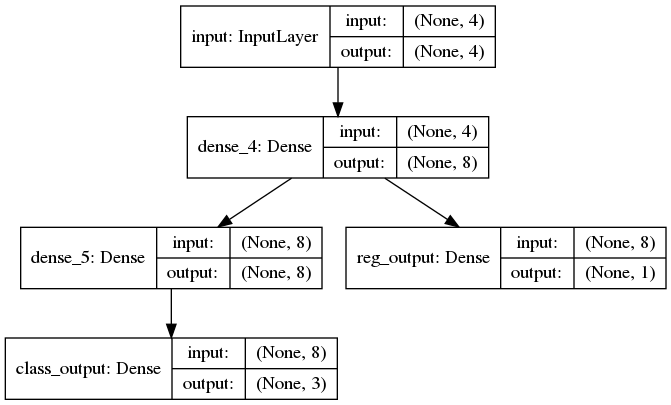

In [66]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)